In [8]:
import os
print("CWD:", os.getcwd())


CWD: c:\Users\ASUS\OneDrive\Desktop\BTP PROJECT\BTP_Implementation\iiot-hybrid-detection


In [6]:
import os

# move back one folder (.. means parent directory)
os.chdir("..")

print("CWD now:", os.getcwd())


CWD now: c:\Users\ASUS\OneDrive\Desktop\BTP PROJECT\BTP_Implementation\iiot-hybrid-detection


Shape: (211043, 44)


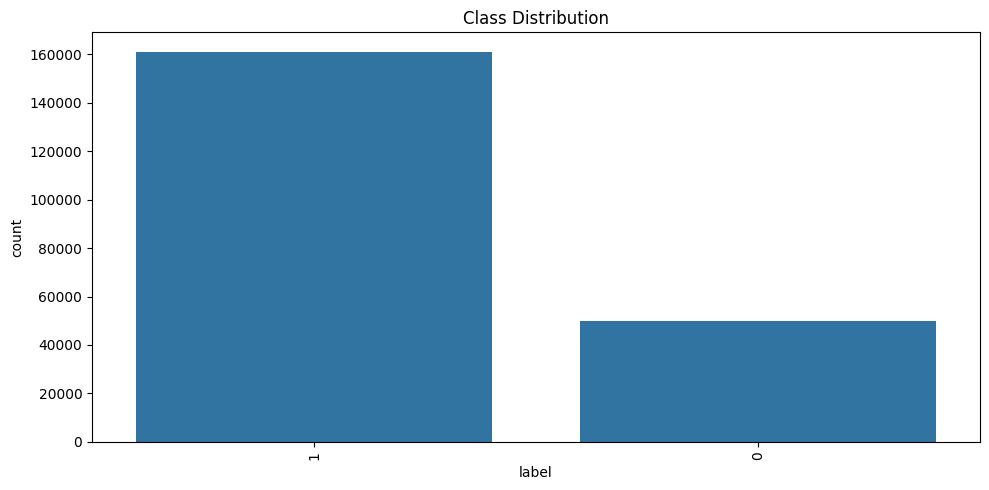


Class counts:
 label
1    161043
0     50000
Name: count, dtype: int64


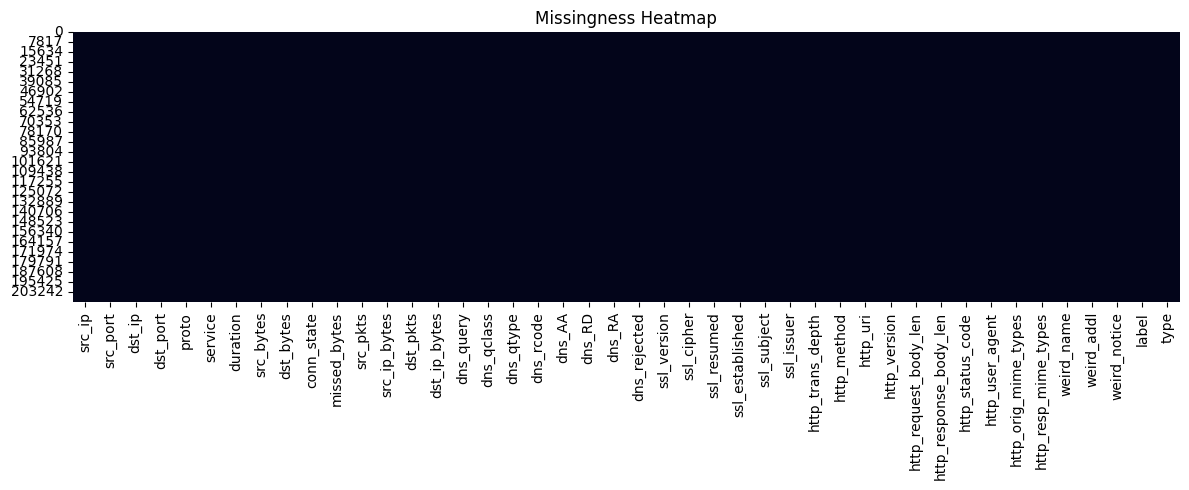

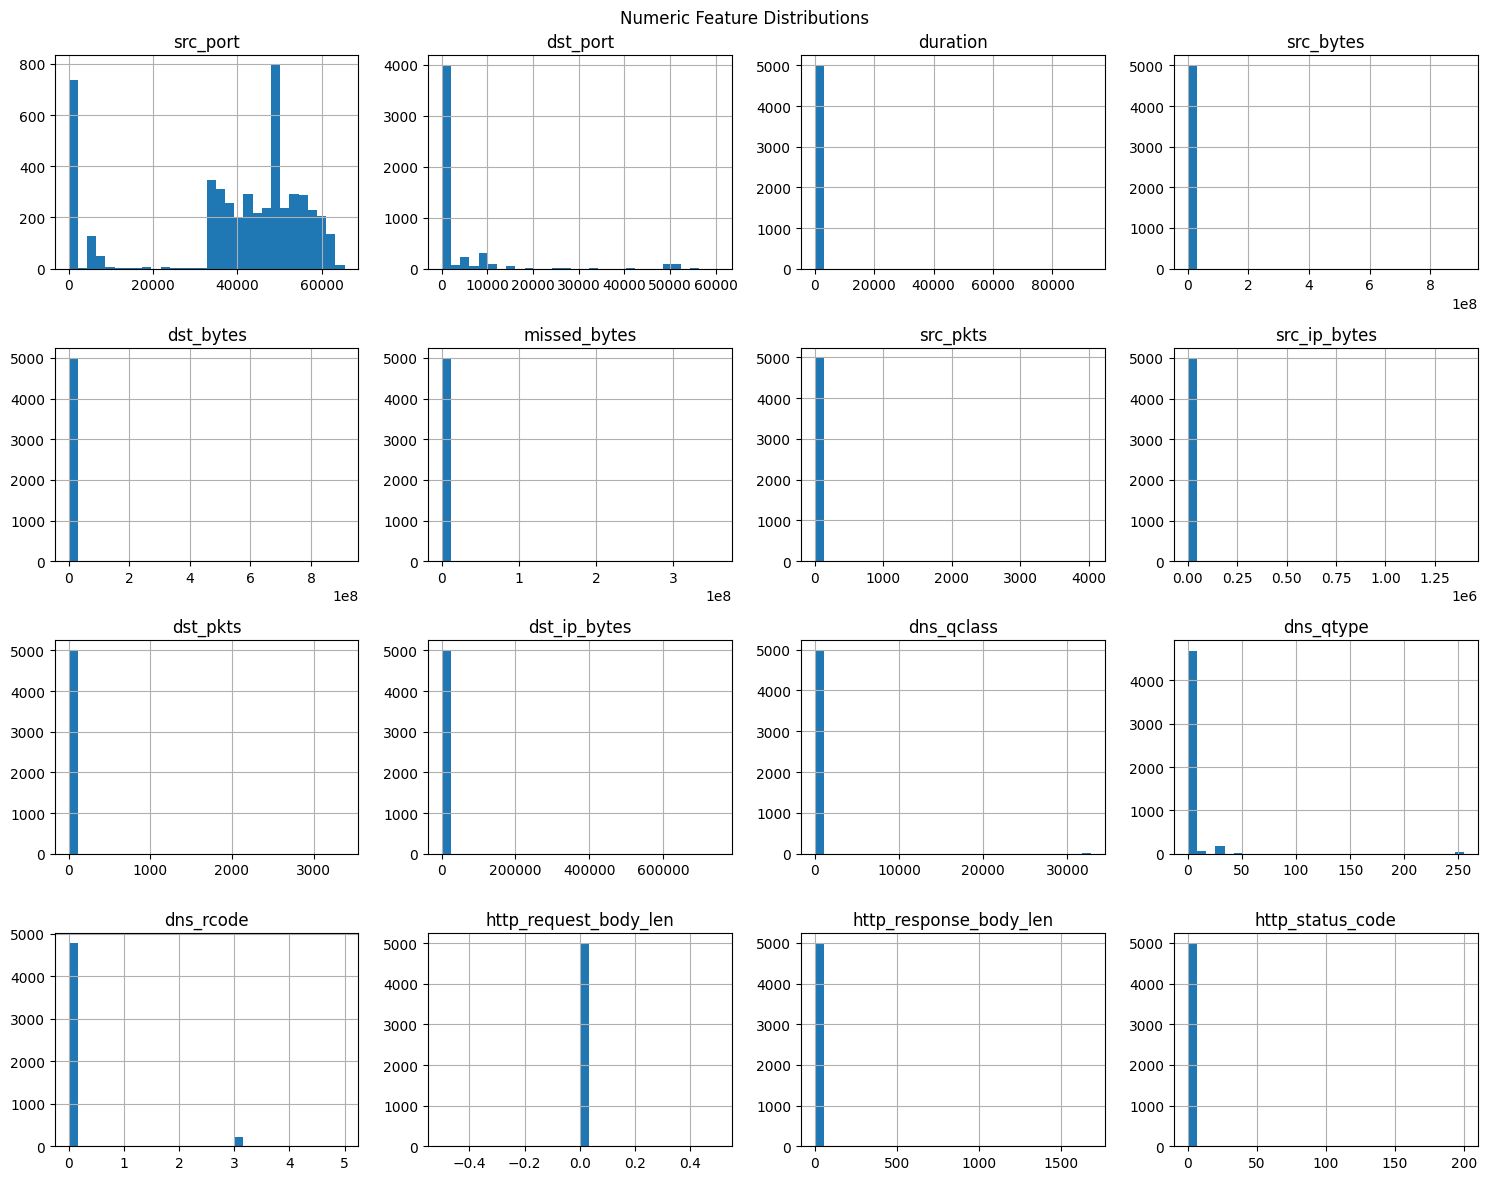

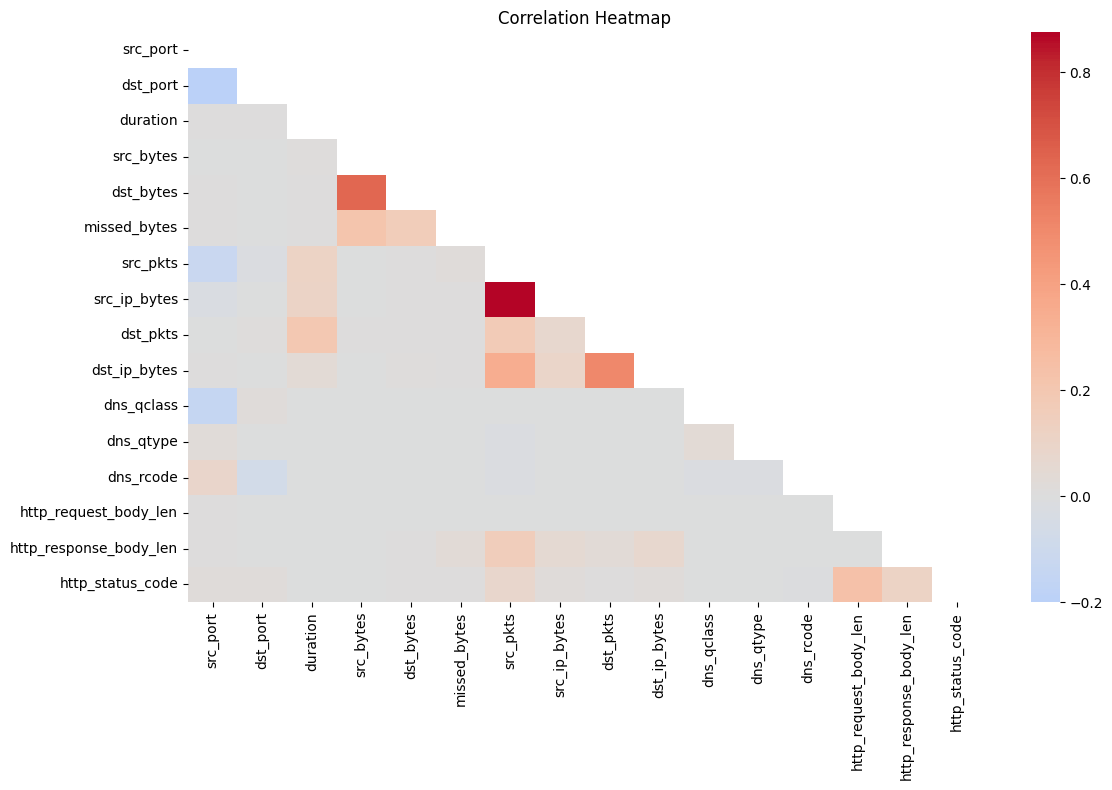

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys, os

# --- Ensure src is visible ---
sys.path.append(os.path.abspath("../src"))
from constants import DATA_PATH, TARGET_COL

# --- Load dataset ---
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)

# --- Class distribution ---
plt.figure(figsize=(10, 5))
sns.countplot(x=TARGET_COL, data=df, order=df[TARGET_COL].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=90)
plt.tight_layout()
os.makedirs("../results/eda", exist_ok=True)
plt.savefig("../results/eda/class_distribution.png", dpi=300)
plt.show()
print("\nClass counts:\n", df[TARGET_COL].value_counts())

# --- Missing values ---
plt.figure(figsize=(12, 5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missingness Heatmap")
plt.tight_layout()
plt.savefig("../results/eda/missingness.png", dpi=300)
plt.show()

# --- Numeric feature distributions ---
num_cols = df.select_dtypes(include=[np.number]).columns.drop(TARGET_COL, errors="ignore")
df[num_cols].sample(min(5000, len(df)), random_state=42).hist(figsize=(15, 12), bins=30)
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout()
plt.savefig("../results/eda/numeric_hist.png", dpi=300)
plt.show()

# --- Correlation heatmap ---
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, mask=mask)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("../results/eda/corr_heatmap.png", dpi=300)
plt.show()

# --- Feature importance proxy ---
if df[TARGET_COL].dtype == "object":
    df_enc = df.copy()
    df_enc[TARGET_COL] = df_enc[TARGET_COL].astype("category").cat.codes
    target_corr = df_enc[num_cols].corrwith(df_enc[TARGET_COL]).sort_values(key=abs, ascending=False)
    print("\nCorrelation with target:\n", target_corr.head(15))
